<a href="https://colab.research.google.com/github/Communist02/BIN-22-1_Mazur_Denis_ML/blob/master/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn nltk pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.9 MB/s eta 0:00:00


In [2]:
import nltk
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
import math

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


class Processing:
    def tokenize(self, text: str) -> list[str]:
        return word_tokenize(text)

    def lematize(self, tokens: list[str]) -> list[str]:
        morph3 = MorphAnalyzer()
        lemmatized_words = [morph3.parse(
            word)[0].normal_form for word in tokens]
        return lemmatized_words

    def stemming(self, tokens: list[str]) -> list[str]:
        stemmer = SnowballStemmer("english")
        lemmatized_words = [stemmer.stem(word) for word in tokens]
        return lemmatized_words

    def vectorize(self, tokens: list[str]) -> list[int]:
        dict_vectors = {}
        result = []
        for word in tokens:
            if word in dict_vectors.keys():
                result.append(dict_vectors[word])
            else:
                dict_vectors[word] = len(dict_vectors)
                result.append(dict_vectors[word])
        return result

    def vectorize_dict(self, tokens: list[str]) -> list[int]:
        dict_vectors = {}
        for word in tokens:
            if word not in dict_vectors.keys():
                dict_vectors[word] = len(dict_vectors)
        return dict_vectors

    def delete_stop_words(self, tokens: list[str]) -> list[int]:
        stop_words = set(stopwords.words('english')).union(
            ['.', ',', ':', '?', '!', '(', ')'])
        return [word for word in tokens if word not in stop_words]

    def bag_of_words(self, tokens: list[str]) -> dict[str]:
        dict_words = {}
        for word in tokens:
            dict_words[word] = dict_words.setdefault(word, 0) + 1
        return dict_words

    def tf(self, tokens: list[str]) -> dict[str]:
        dict_words = self.bag_of_words(tokens)
        for word in dict_words:
            dict_words[word] /= len(tokens)
        return dict_words

    def idf(self, texts: list[list[str]]) -> dict[str]:
        dict_words = {}
        big_text = []
        for text in texts:
            big_text += list(set(text))
        for word in set(big_text):
            dict_words[word] = math.log(len(texts) / big_text.count(word))
        return dict_words

    def tf_idf(self, texts: list[list[str]], indexText: int) -> dict[str]:
        tf = self.tf(texts[indexText])
        idf = self.idf(texts)
        dict_words = {}
        for word in tf:
            dict_words[word] = tf[word] * idf[word]
        return dict_words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# The AG News Corpus is a popular dataset commonly used for text classification tasks in Natural Language Processing (NLP). It consists of news articles collected from the AG's corpus of news articles on the web, categorized into four classes: World, Sports, Business, and Science/Technology. Each article is accompanied by a title and a short description, making it suitable for tasks like topic classification and sentiment analysis. With its diverse range of topics and well-labeled categories, the AG News Corpus serves as a valuable resource for training and evaluating machine learning models in various NLP applications.

# Description:

# Dataset: AG News Corpus
# Source: AG's corpus of news articles on the web.
# Content: News articles categorized into World, Sports, Business, and Science/Technology.
# Labels: Four class labels representing different news categories.
# Scope: Covers a broad range of current events and topics.
# Size: Typically contains thousands of articles.
# Language: Primarily in English.

In [4]:
import pandas as pd

df = pd.read_csv('train.csv')
df = df.head(10000)
pc = Processing()

In [5]:
df

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
9995,4,Winamp flaw: Digital attacks use skins for cam...,Users of the music player should watch out for...
9996,4,BMC adds PeopleSoft management,BMC Software has released a new version of Pat...
9997,3,CAO chief faces Singapore probe,The chief of Beijing-backed China Aviation Oil...
9998,3,A Microsoft deal gets full EU inquiry,BRUSSELS The European Commission has opened an...


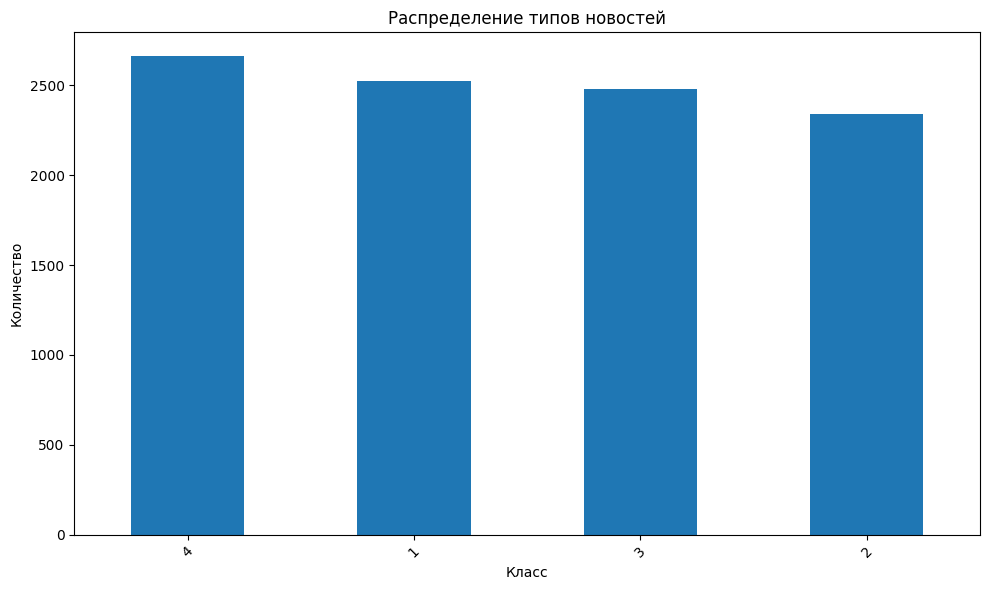

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Class Index'].value_counts().plot(kind='bar')
plt.title('Распределение типов новостей')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
for index, row in df.iterrows():
    text = row['Title']
    tokens = pc.tokenize(text)  # Токенизация
    tokens = pc.delete_stop_words(tokens)  # Удаление стоп слов

    row['Title'] = ' '.join(tokens)

    text = row['Description']
    tokens = pc.tokenize(text)  # Токенизация
    tokens = pc.delete_stop_words(tokens)  # Удаление стоп слов

    row['Description'] = ' '.join(tokens)

In [8]:
y = df['Class Index']
# x = df.copy().drop('Class Index', axis=1)
x = df['Title']

Векторизация через TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Title'])

Кластеризация

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=len(set(y)), random_state=42)
clusters = kmeans.fit_predict(X)

Визуализация

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


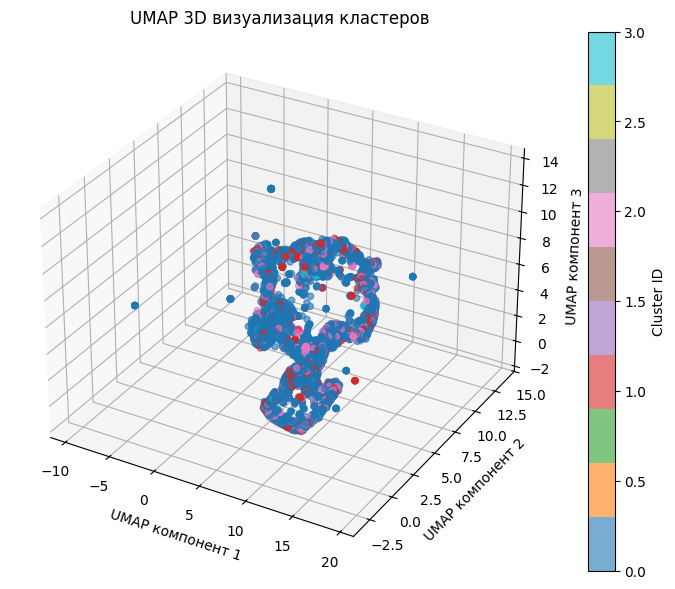

In [11]:
import umap

# Применяем UMAP для уменьшения размерности до 3D
umap_model = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_model.fit_transform(X.toarray())

# Визуализируем результаты кластеризации в 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=clusters, cmap='tab10', alpha=0.6)

ax.set_title("UMAP 3D визуализация кластеров")
ax.set_xlabel("UMAP компонент 1")
ax.set_ylabel("UMAP компонент 2")
ax.set_zlabel("UMAP компонент 3")
plt.colorbar(scatter, ax=ax, label='Cluster ID')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score

if len(set(y)) > 1:
    score = silhouette_score(X, y)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Все точки в одном кластере!")

# Анализ результатов
df['cluster'] = y
for cluster in sorted(df['cluster'].unique()):
    print(f"\n Кластер {cluster}:")
    print(df[df['cluster'] == cluster]['Class Index'].value_counts().head(5))

Silhouette Score: 0.001

 Кластер 1:
Class Index
1    2523
Name: count, dtype: int64

 Кластер 2:
Class Index
2    2338
Name: count, dtype: int64

 Кластер 3:
Class Index
3    2477
Name: count, dtype: int64

 Кластер 4:
Class Index
4    2662
Name: count, dtype: int64


In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

Обучение

In [15]:
import torch


In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=len(set(y)))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
from datasets import Dataset

def preprocess(examples):
    return tokenizer(examples["text"], truncation=True, padding=True)

train_dataset = Dataset.from_dict({"text": x_train, "label": y_train})
valid_dataset = Dataset.from_dict({"text": x_valid, "label": y_valid})
test_dataset  = Dataset.from_dict({"text": x_test,  "label": y_test})

train_dataset = train_dataset.map(preprocess, batched=True)
valid_dataset = valid_dataset.map(preprocess, batched=True)
test_dataset  = test_dataset.map(preprocess, batched=True)

Map:   0%|          | 0/6400 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [18]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.0 MB/s eta 0:00:00


In [22]:
from transformers import TrainingArguments, Trainer
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    return accuracy.compute(predictions=preds, references=labels)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=10,
    logging_dir="./logs",
    load_best_model_at_end=True,
    report_to="none",
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=valid_dataset,
    processing_class=tokenizer,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.115200,1.015960,0.845000
2,0.099900,1.012150,0.835000
3,0.096100,1.072520,0.850000
4,0.059700,1.054717,0.852500
5,0.042100,1.100585,0.863125
6,0.026500,1.172770,0.854375
7,0.017900,1.148128,0.856875
8,0.018000,1.156063,0.864375
9,0.009500,1.190792,0.859375
10,0.007200,1.218100,0.858750


TrainOutput(global_step=8000, training_loss=0.04875502923130989, metrics={'train_runtime': 531.8418, 'train_samples_per_second': 120.337, 'train_steps_per_second': 15.042, 'total_flos': 673778058094848.0, 'train_loss': 0.04875502923130989, 'epoch': 10.0})

Оценка на тестовой выборке

In [23]:
results = trainer.evaluate(test_dataset)
print(results)

{'eval_loss': 1.1224578619003296, 'eval_accuracy': 0.8115, 'eval_runtime': 2.7414, 'eval_samples_per_second': 729.543, 'eval_steps_per_second': 91.193, 'epoch': 10.0}


Training loss: 0.0488 — очень низкое значение, что говорит о хорошей сходимости модели на обучающем наборе. Это указывает на то, что модель смогла очень точно "выучить" тренировочные данные.
При обучающей ошибке 0.05 и валидационной loss 1.12, возможно, модель немного переобучилась.
Точность 81.15% — это хороший показатель. Модель способна правильно классифицировать более 8 из 10 примеров.

In [28]:
# Получение логитов (сырых предсказаний) и истинных меток
predictions = trainer.predict(test_dataset)

logits = predictions.predictions
y_true = predictions.label_ids
y_pred = logits.argmax(axis=-1)

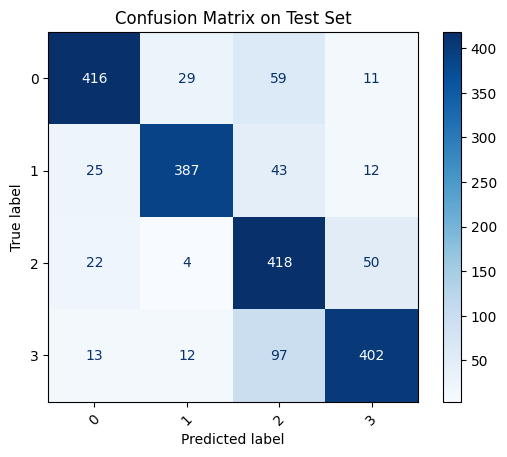

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Создаём матрицу
cm = confusion_matrix(y_true, y_pred)

# Отображаем матрицу
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix on Test Set")
plt.grid(False)
plt.show()

Диагональ показывает, сколько примеров предсказано верно по каждому классу.

Вне диагонали — ошибки: видно, какие классы модель путает чаще всего.